In [1]:
import a4_lib
import a4_ex1_solution

In [2]:
NUM_EPOCH       = 5
LEARNING_RATE   = 0.001
BATCH_SIZE      = 100
MAX_SAMPLES     = None # Default: None => all data
VERBOSE_LEVEL   = a4_lib.VerboseLevel.HIGH

[ALERT] Attempt to use GPU => CUDA:0
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: []
=== Data Loaded [Testing] ===
=== Loading Data ... 
> Resized to (32, 32)
=== Data Loaded [Training] ===
> epoch 1/5:
  >> Learning (wip)
  >> Testing (wip)
    epoch 2 > Training: [LOSS: 0.4739 | ACC: 0.8329] | Testing: [LOSS: 0.1327 | ACC: 0.9564] Ellapsed: 15.04 s | rate:1.70427
> epoch 2/5:
  >> Learning (wip)
  >> Testing (wip)
    epoch 3 > Training: [LOSS: 0.0806 | ACC: 0.9805] | Testing: [LOSS: 0.0575 | ACC: 0.9875] Ellapsed: 15.03 s | rate:1.50345
> epoch 3/5:
  >> Learning (wip)
  >> Testing (wip)
    epoch 4 > Training: [LOSS: 0.0703 | ACC: 0.9836] | Testing: [LOSS: 0.0682 | ACC: 0.9842] Ellapsed: 15.05 s | rate:1.67902
> epoch 4/5:
  >> Learning (wip)
  >> Testing (wip)
    epoch 5 > Training: [LOSS: 0.0572 | ACC: 0.9878] | Testing: [LOSS: 0.0534 | ACC: 0.9893] Ellapsed: 15.07 s | rate:1.49144
> epoch 5/5:
  >> Learning (wip)
  >> Testing (wip)
    epoch 6 > Training: [LOSS: 

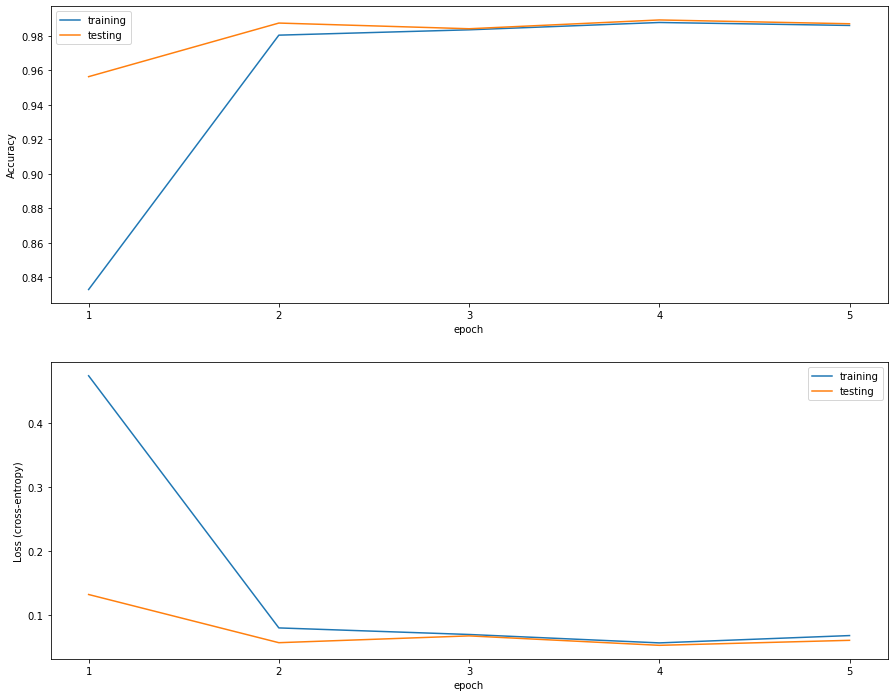

==== P4.3 : Test: HFlip-1
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['HFlip-1']
=== Data Loaded [Training] ===
  >> Testing (wip)
> [HFlip-1] test_loss: 15.806810998916626, test_acc: 0.3913, test_n: 10000, test_ellapse: 1.9784889221191406
==== P4.3 : Test: VFlip-1
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['VFlip-1']
=== Data Loaded [Training] ===
  >> Testing (wip)
> [VFlip-1] test_loss: 12.589060988426208, test_acc: 0.444, test_n: 10000, test_ellapse: 1.8563086986541748
==== P4.3 : Test: GAUSS-0.01
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['GAUSS-0.01']
=== Data Loaded [Training] ===
  >> Testing (wip)
> [GAUSS-0.01] test_loss: 0.05693353335987922, test_acc: 0.988, test_n: 10000, test_ellapse: 1.4924373626708984
==== P4.3 : Test: GAUSS-0.1
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['GAUSS-0.1']
=== Data Loaded [Training] ===
  >> Testing (wip)
> [GAUSS-0.1] test_loss: 0.06155671379303385, test_acc: 0.987, test_n

In [3]:
# Raw Trial:
model1 = a4_ex1_solution.solve_a4_ex1(
    # USER DEFINE: ----- ----- ----- ----- ----- ----- ----- ----- ----- #
    TOTA_NUM_EPOCHS = NUM_EPOCH,
    LEARNING_RATE   = LEARNING_RATE,
    BATCH_SIZE      = BATCH_SIZE,
    MAX_SAMPLES     = MAX_SAMPLES, # Default: None => all data
    # const:
    OUT_DIR_E1      = "output/E1",
    IMG_SIZE        = (32, 32),
    VERBOSE_LEVEL   = a4_lib.VerboseLevel.HIGH,
    TRAINING_AUG    = [], # Options: ["HFlip", "VFlip", "GAUSS-0.01"],
)

[ALERT] Attempt to use GPU => CUDA:0
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['HFlip', 'VFlip', 'GAUSS-0p5-0p5']
=== Data Loaded [Testing] ===
=== Loading Data ... 
> Resized to (32, 32)
=== Data Loaded [Training] ===
> epoch 1/5:
  >> Learning (wip)
  >> Testing (wip)
    epoch 2 > Training: [LOSS: 1.2047 | ACC: 0.5454] | Testing: [LOSS: 0.4966 | ACC: 0.8439] Ellapsed: 17.50 s | rate:1.49579
> epoch 2/5:
  >> Learning (wip)
  >> Testing (wip)
    epoch 3 > Training: [LOSS: 0.4214 | ACC: 0.8754] | Testing: [LOSS: 0.2206 | ACC: 0.9372] Ellapsed: 16.65 s | rate:1.46651
> epoch 3/5:
  >> Learning (wip)
  >> Testing (wip)
    epoch 4 > Training: [LOSS: 0.2781 | ACC: 0.9230] | Testing: [LOSS: 0.2057 | ACC: 0.9423] Ellapsed: 15.87 s | rate:1.47337
> epoch 4/5:
  >> Learning (wip)
  >> Testing (wip)
    epoch 5 > Training: [LOSS: 0.2404 | ACC: 0.9339] | Testing: [LOSS: 0.2195 | ACC: 0.9411] Ellapsed: 15.24 s | rate:1.67282
> epoch 5/5:
  >> Learning (wip)
  >> Testing (wip

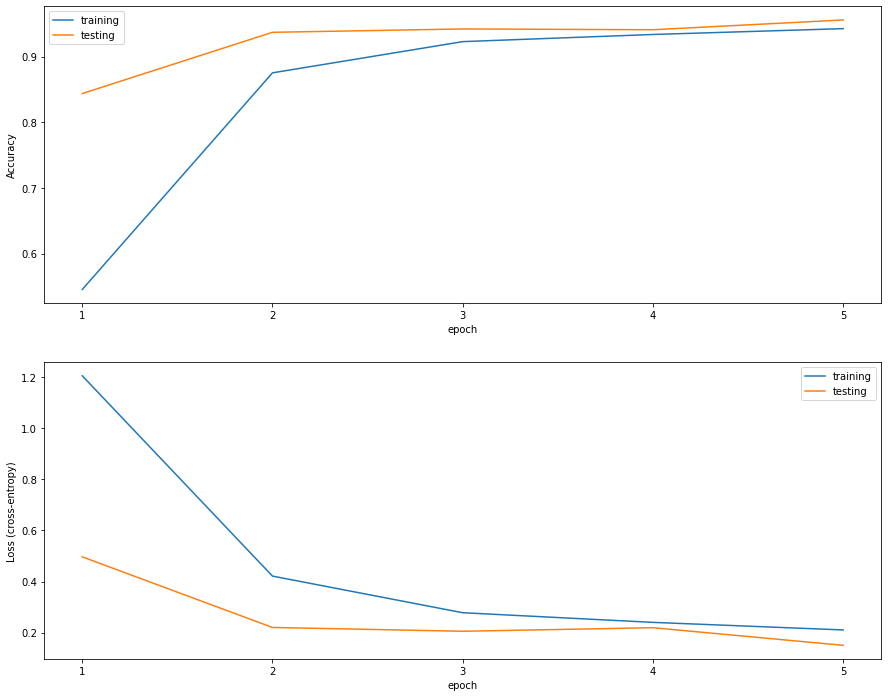

==== P4.3 : Test: HFlip-1
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['HFlip-1']
=== Data Loaded [Training] ===
  >> Testing (wip)
> [HFlip-1] test_loss: 0.1344222220242955, test_acc: 0.9611, test_n: 10000, test_ellapse: 1.8633904457092285
==== P4.3 : Test: VFlip-1
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['VFlip-1']
=== Data Loaded [Training] ===
  >> Testing (wip)
> [VFlip-1] test_loss: 0.1353238343121484, test_acc: 0.9627, test_n: 10000, test_ellapse: 1.9178013801574707
==== P4.3 : Test: GAUSS-0.01
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['GAUSS-0.01']
=== Data Loaded [Training] ===
  >> Testing (wip)
> [GAUSS-0.01] test_loss: 0.1534261830104515, test_acc: 0.957, test_n: 10000, test_ellapse: 1.4692792892456055
==== P4.3 : Test: GAUSS-0.1
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['GAUSS-0.1']
=== Data Loaded [Training] ===
  >> Testing (wip)
> [GAUSS-0.1] test_loss: 0.14815876559820026, test_acc: 0.9573, test_

In [4]:
# Augmented Trial
model2 = a4_ex1_solution.solve_a4_ex1(
    # USER DEFINE: ----- ----- ----- ----- ----- ----- ----- ----- ----- #
    TOTA_NUM_EPOCHS = NUM_EPOCH,
    LEARNING_RATE   = LEARNING_RATE,
    BATCH_SIZE      = BATCH_SIZE,
    MAX_SAMPLES     = MAX_SAMPLES, # Default: None => all data
    # const:
    OUT_DIR_E1      = "output/E1",
    IMG_SIZE        = (32, 32),
    VERBOSE_LEVEL   = a4_lib.VerboseLevel.HIGH,
    TRAINING_AUG    = ["HFlip", "VFlip", "GAUSS-0p5-0p5"],
)

[ALERT] Attempt to use GPU => CUDA:0
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: 
=== Data Loaded [Training] ===


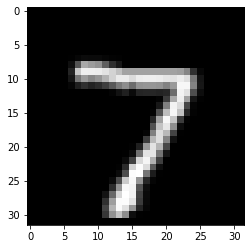

[]> y:tensor([7]) | y1:tensor([8], device='cuda:0') , y2:tensor([2], device='cuda:0')
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: HFlip-1
=== Data Loaded [Training] ===


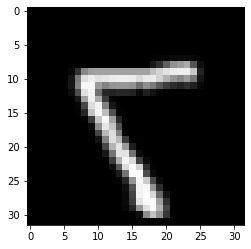

[HFlip-1]> y:tensor([7]) | y1:tensor([8], device='cuda:0') , y2:tensor([9], device='cuda:0')
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: VFlip-1
=== Data Loaded [Training] ===


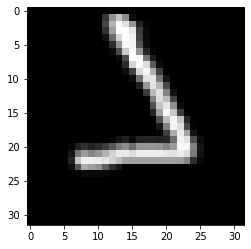

[VFlip-1]> y:tensor([7]) | y1:tensor([5], device='cuda:0') , y2:tensor([4], device='cuda:0')
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: GAUSS-0.01
=== Data Loaded [Training] ===


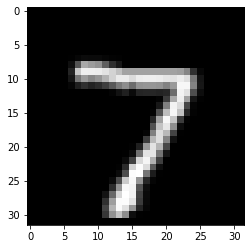

[GAUSS-0.01]> y:tensor([7]) | y1:tensor([8], device='cuda:0') , y2:tensor([4], device='cuda:0')
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: GAUSS-0.1
=== Data Loaded [Training] ===


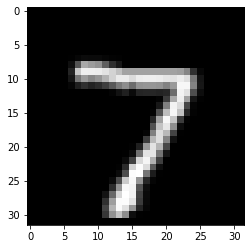

[GAUSS-0.1]> y:tensor([7]) | y1:tensor([8], device='cuda:0') , y2:tensor([9], device='cuda:0')
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: GAUSS-1
=== Data Loaded [Training] ===


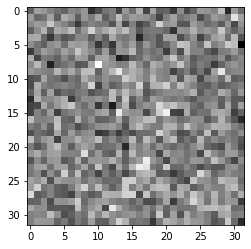

[GAUSS-1]> y:tensor([7]) | y1:tensor([8], device='cuda:0') , y2:tensor([4], device='cuda:0')


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch as t

device = None
if t.cuda.is_available():
    print("[ALERT] Attempt to use GPU => CUDA:0")
    device = t.device("cuda:0")
else:
    print("[ALERT] GPU not found, use CPU!")
    device =  t.device("cpu")

for augmentation in ["", "HFlip-1", "VFlip-1", "GAUSS-0.01", "GAUSS-0.1", "GAUSS-1"]:
    # Loading training dataset:
    train_dataset = a4_lib.A4_EX1_CNN_HELPER.load_mnist_data(
        batch_size   = 1, 
        resize       = (32,32), # NOTE: make sure you understand why
        n_workers    = 1,
        augmentation = augmentation,
        shuffle      = False,
        train_set    = False,
    )
    sample_x = None
    sample_y = None
    for X, y in train_dataset:
        sample_x = X
        sample_y = y
        plt.figure()
        plt.imshow(sample_x[0][0], "gray")
        plt.show()
        break

    # test
    sample_x = sample_x.to(device)
    y_prediction_1 = model1(sample_x).argmax(dim=1)
    y_prediction_2 = model2(sample_x).argmax(dim=1)
    
    print("[{}]> y:{} | y1:{} , y2:{}".format(augmentation, sample_y, y_prediction_1, y_prediction_2))